In [1]:
import glob
import numpy as np
from pathlib import Path
from math import floor
import timeit
import os
import random
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import auc, precision_recall_curve                                                  


# Define data directories
DCA_ER_dir = '/data/cresswellclayec/DCA_ER' # Set DCA_ER directory
biowulf_dir = '%s/biowulf_full' % DCA_ER_dir
processed_data_dir = "%s/protein_data/data_processing_output/" % biowulf_dir

pdb_path = "/data/cresswellclayec/DCA_ER/biowulf_full/protein_data/metrics"
data_path = "/data/cresswellclayec/DCA_ER/biowulf_full/protein_data/data_processing_output"
metric_dir = "/data/cresswellclayec/DCA_ER/biowulf_full/protein_data/metrics"


ER_tprs = []
ER_fprs = []
PMF_tprs = []
PMF_fprs = []
PLM_tprs = []
PLM_fprs = []
MF_tprs = []
MF_fprs = []

ks_compares = []

ER_bootstrap_aucs = []

MSA_sizes = []
# # Get list of files from completed TP files
# tp_files = list(Path(pdb_path).rglob("*PLM_tp.npy"))
# tp_files_str = [str(os.path.basename(path)) for path in tp_files]
# pfam_ids = [tp_str[5:12] for tp_str in tp_files_str] 
# pdb_ids = [tp_str[:4] for tp_str in tp_files_str] 

file_end = '_uni.npy'
file_end = '.npy'
file_end = '_uni_ld5.npy'

# Get list of files from completed auc-bootstrap files
boot_auc_files = list(Path(pdb_path).rglob("*bootstrap_aucs.npy"))
boot_auc_files_str = [str(os.path.basename(path)) for path in boot_auc_files]
pfam_ids = [tp_str[:7] for tp_str in boot_auc_files_str] 
pdb_ids = [tp_str[8:12] for tp_str in boot_auc_files_str] 
effective_seqs = []
print(pfam_ids[:10])
for i, pdb_id in enumerate(pdb_ids):
    pfam_id = pfam_ids[i]
    try:
        ER_fp_file = "%s/%s_%s_ER_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        ER_tp_file = "%s/%s_%s_ER_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        ER_fp = np.load(ER_fp_file)
        ER_tp = np.load(ER_tp_file)
        
        PMF_fp_file = "%s/%s_%s_PMF_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PMF_tp_file = "%s/%s_%s_PMF_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PMF_fp = np.load(PMF_fp_file)
        PMF_tp = np.load(PMF_tp_file)
        
        PLM_fp_file = "%s/%s_%s_PLM_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PLM_tp_file = "%s/%s_%s_PLM_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PLM_fp = np.load(PLM_fp_file)
        PLM_tp = np.load(PLM_tp_file)
        
        MF_fp_file = "%s/%s_%s_MF_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        MF_tp_file = "%s/%s_%s_MF_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        MF_fp = np.load(MF_fp_file)
        MF_tp = np.load(MF_tp_file)   
        
        ER_bootstrap_file = "%s/%s_%s_bootstrap_aucs.npy" % (pdb_path, pfam_id, pdb_id)
        ER_bootstrap = np.load(ER_bootstrap_file)
        
        MSA_file = "%s/%s_%s_preproc_msa.npy" % (data_path, pfam_id, pdb_id)
        MSA = np.load(MSA_file)
        
        pfam_dimensions_file = "%s%s_%s_pfam_dimensions.npy" % (processed_data_dir, pdb_id, pfam_id)
        pfam_dimensions = np.load(pfam_dimensions_file)

        ks_file = "%s/%s_%s_ks.pkl" % (pdb_path, pdb_id, pfam_id)
        with open(ks_file, "rb") as f:
            ks = pickle.load(f)
        f.close()

    except(FileNotFoundError):
        continue
    PMF_fprs.append(PMF_fp)
    PMF_tprs.append(PMF_tp)
    MF_fprs.append(MF_fp)
    MF_tprs.append(MF_tp)
    ER_fprs.append(ER_fp)
    ER_tprs.append(ER_tp)
    PLM_fprs.append(PLM_fp)
    PLM_tprs.append(PLM_tp)
    
    ks_compares.append(ks)
    
    ER_bootstrap_aucs.append(ER_bootstrap)
    MSA_sizes.append(MSA.shape)
    if len(pfam_dimensions)==7:
        [n_col, n_seq, m_eff, ct_ER, ct_MF, ct_PMF, ct_PLM] = pfam_dimensions
    elif len(pfam_dimensions)==3:
        [n_col, n_seq, m_eff] = pfam_dimensions
    effective_seqs.append(m_eff)

print(len(pfam_ids), ' Pfams plotted')

['PF00303', 'PF06815', 'PF02670', 'PF00061', 'PF01564', 'PF00567', 'PF01433', 'PF00241', 'PF00190', 'PF00509']
6541  Pfams plotted


# Plotting all ROC curves

[0.         0.01616665 0.01616665 ... 0.99974053 0.99974128 0.99974179]
[0.00000000e+00 4.90234528e-06 5.91103887e-06 ... 9.99901555e-01
 9.99912296e-01 1.00000000e+00]


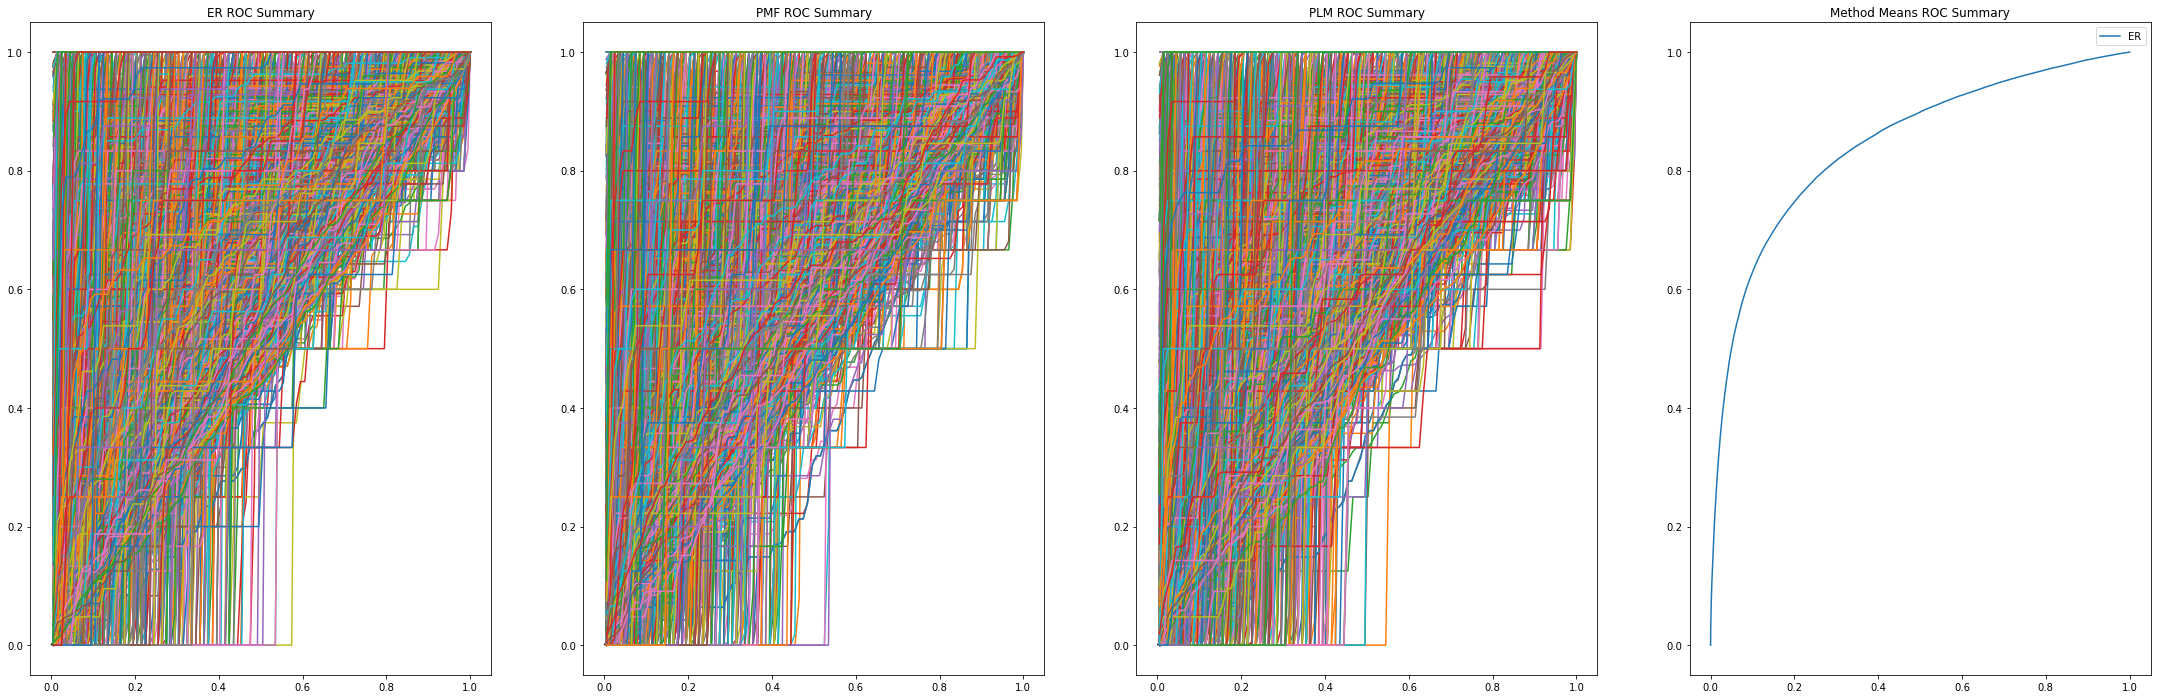

In [2]:
# method_tprs = [ER_tprs, PMF_tprs, PLM_tprs, MF_tprs]
# method_fprs = [ER_fprs, PMF_fprs, PLM_fprs, MF_fprs]
# method_label = ['ER', 'PMF', 'PLM', 'MF']

method_tprs = [ER_tprs, PMF_tprs, PLM_tprs]
method_fprs = [ER_fprs, PMF_fprs, PLM_fprs]
method_label = ['ER', 'PMF', 'PLM']
method_color = 'brg'
plt.figure(figsize=(38.0,12))
method_aucs = []
for i, method_tpr_data in enumerate(method_tprs):
    method_fpr_data = method_fprs[i]
    method_aucs.append([])
    # Initalize ROC-curve tile
    plt.subplot2grid((1,4),(0,i))
    plt.title('%s ROC Summary' % method_label[i])
    plt.plot([0,1],[0,1],'k--')

    for j, tpr in enumerate(method_tpr_data):

        fpr = method_fpr_data[j]
        method_aucs[-1].append(auc(fpr,tpr))
        try:
            plt.plot(fpr, tpr)
        except:
            pass
plt.subplot2grid((1,4),(0,3))
plt.title('Method Means ROC Summary')
# plt.plot([0,1],[0,1],'k--')

for i, method in enumerate(method_label[:1]):
    avg_fpr = np.load('%s/%s_avg_fpr.npy' % (metric_dir, method))
    avg_tpr = np.load('%s/%s_avg_tpr.npy' % (metric_dir, method))
    print(avg_tpr)
    print(avg_fpr)
    plt.plot(avg_fpr, avg_tpr, label=method)
plt.legend()
plt.show()

# Histogram of AUC values

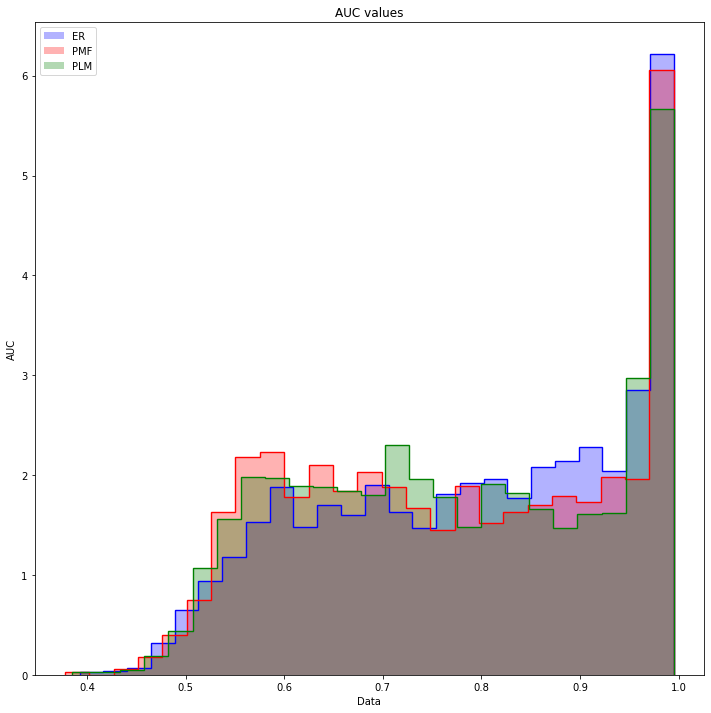

In [3]:
# bin AUC values for each method
plt.figure(figsize=(12.0,12))


for i, method_auc in enumerate(method_aucs):
    method = method_label[i]
    plt.hist(method_auc, density=True, bins=25, alpha=.3, label = method, color=method_color[i])  # density=False would make counts
    plt.hist(method_auc, density=True, bins=25, histtype='step', color=method_color[i], linewidth=1.4)  # density=False would make counts

plt.legend()
plt.title('AUC values')
plt.ylabel('AUC')
plt.xlabel('Data');
plt.show()


# Which Method is Best

/data/cresswellclayec/conda/envs/plotting/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/cresswellclayec/conda/envs/plotting/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


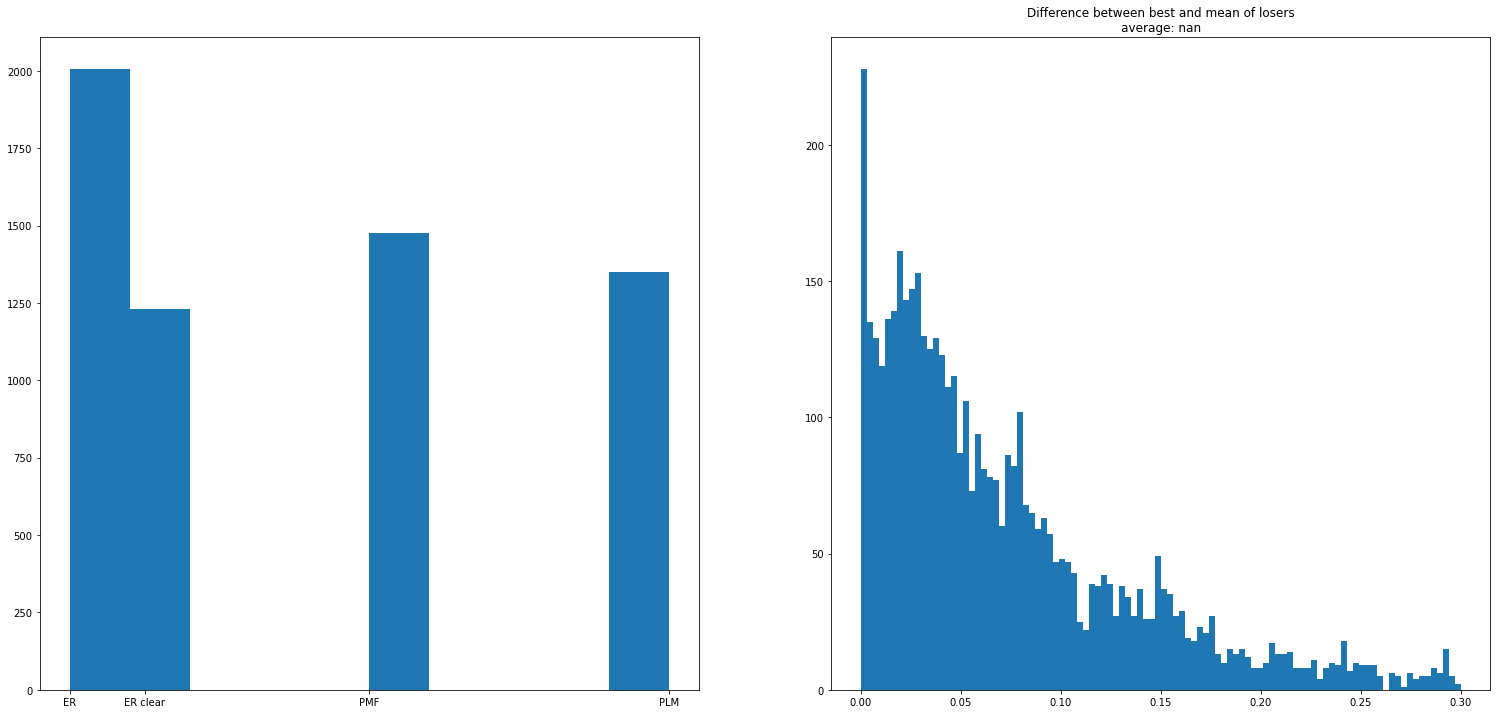

In [4]:
# plot best Method
max_auc_indices = []
max_aucs = []
auc_differences = []
for i, er_auc in enumerate(method_aucs[0]):
    pmf_auc = method_aucs[1][i]
    plm_auc = method_aucs[2][i]
    auc_compare = [er_auc, pmf_auc, plm_auc]
    max_auc = max(auc_compare)
    max_aucs.append(max_auc)
    max_auc_index = auc_compare.index(max_auc)
    max_auc_indices.append(max_auc_index)
    auc_differences.append(abs(max_auc - np.mean([auc for auc in auc_compare if auc!=max_auc])))
    
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(ER_bootstrap_aucs[i], p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(ER_bootstrap_aucs[i], p))
    #print('ER auc =%f PLM auc=%f PMF auc=%f\n%.1f confidence interval %.1f%% and %.1f%%' % 
    #      (er_auc, plm_auc, pmf_auc, alpha*100, lower*100, upper*100))
    if max_auc_index == 0 and np.mean([auc for auc in auc_compare if auc!=max_auc]) < lower:
        max_auc_indices.append(.25)


plt.figure(figsize=(26.0,12))
ax = plt.subplot2grid((1,2),(0,0))
ax.hist(max_auc_indices ,range=(0,2) )  # density=False would make counts
ax.set_xticks([0,.25,1,2])
ax.set_xticklabels(['ER', 'ER clear', 'PMF', 'PLM'])
plt.subplot2grid((1,2), (0,1))
plt.hist(auc_differences, bins = 100, range=(0,.3))  # density=False would make counts
plt.title('Difference between best and mean of losers\naverage: %f' % np.mean(auc_differences))
plt.show()



# Binning By Column Length

;4834, 6066, 4834
[(22.0, 63.0), (63.0, 104.0), (104.0, 145.0), (145.0, 186.0), (186.0, 227.0), (227.0, 268.0), (268.0, 309.0), (309.0, 350.0), (350.0, 391.0)]


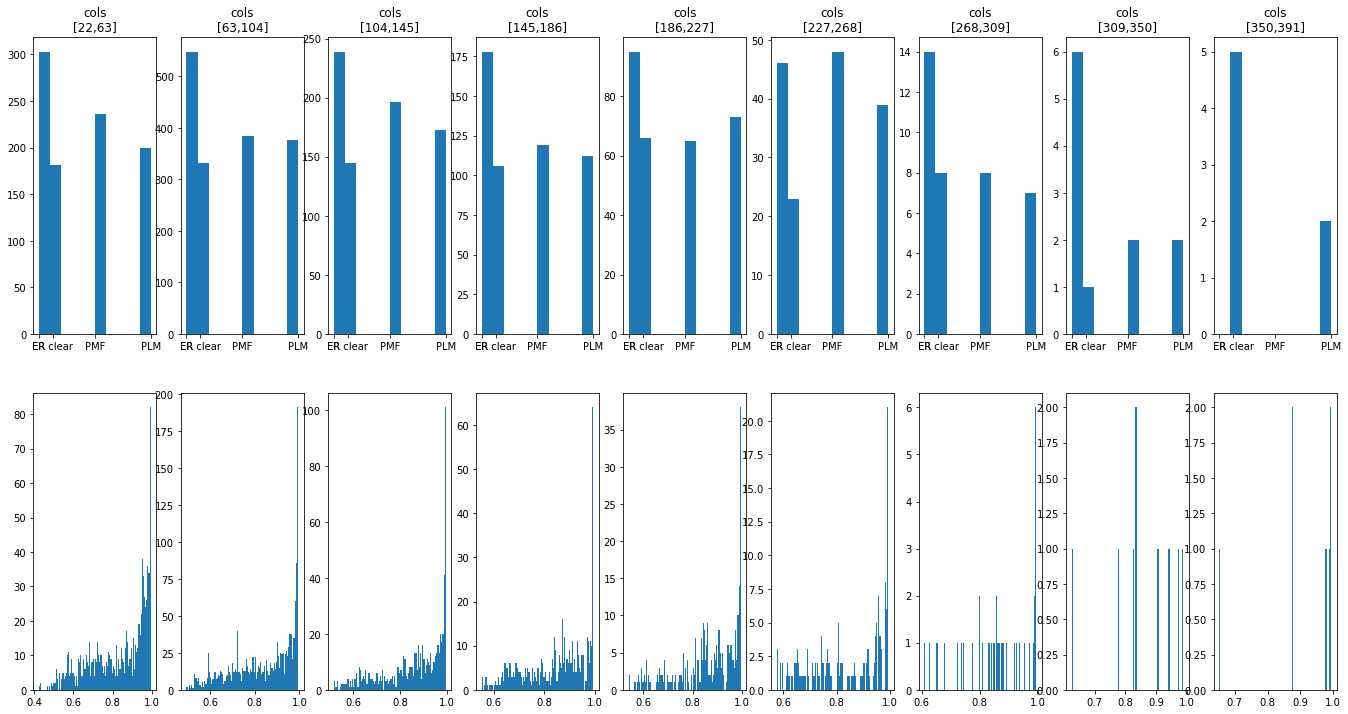

In [5]:
def bin_by(aucs, max_aucs, shapes, metric_label='cols', n_bins=5):
    n_bins = 10
    
    # set up bins
    binned_auc = []
    binned_method = []
    binned_range = []
    for i in range(n_bins):
        binned_auc.append([])
        binned_method.append([])

    # clear values with not enough sequences.
    bad_indices = []
    for i, msa_shape in enumerate(shapes):
        if msa_shape[0] < 300:
            # print('%d seqs not enough' % msa_shape[0])
            bad_indices.append(i)
    bad_indices = sorted(bad_indices, reverse=True)
    for idx in bad_indices:
        if idx < len(shapes):
            shapes.pop(idx)
            aucs.pop(idx)
            max_aucs.pop(idx)
            
    # set up metric
    if metric_label=='cols':
        metric = [msa_shape[1] for msa_shape in shapes]
    elif metric_label=='num_seq':
        metric = [msa_shape[0] for msa_shape in shapes]
    

    # bin metric values
    if metric_label=='cols':
        bins = np.linspace(min(metric), max(metric), num=n_bins)
    elif metric_label=='num_seq':
        print(min(metric), max(metric))
        bins = np.geomspace(min(metric), max(metric), num=n_bins)

    for i, auc in enumerate(aucs):
        for j, (lower, upper) in enumerate(zip(bins, bins[1:])):
            if i==0:
                binned_range.append((lower,upper))
            if metric[i] >= lower and metric[i] <= upper:
                binned_auc[j].append(auc)
                binned_method[j].append(max_aucs[i])
    return binned_auc, binned_method, binned_range



print(';%d, %d, %d' % (len(max_aucs), len(max_auc_indices), len(MSA_sizes)))
binned_auc, binned_method, binned_range = bin_by(max_aucs, max_auc_indices, MSA_sizes, metric_label='cols', n_bins=5)  
print(binned_range)

plt.figure(figsize=(26.0,12))
for i, auc_bin in enumerate(binned_auc[:-1]):
    method_bin = binned_method[i]
    
    ax = plt.subplot2grid((2,len(binned_auc)), (0,i))
    ax.hist(method_bin ,range=(0,2) )  # density=False would make counts
    ax.set_xticks([0,.25,1,2])
    ax.set_xticklabels(['ER', 'ER clear', 'PMF', 'PLM'])
    ax.set_title('%s\n[%d,%d]' %('cols', binned_range[i][0], binned_range[i][1]))
    plt.subplot2grid((2,len(binned_auc)),(1,i))
    plt.hist(auc_bin, bins = 100)  # density=False would make counts
plt.show()

300 65967
[(300.0, 546.2183776244916), (546.2183776244916, 994.5150535157719), (994.5150535157719, 1810.7413301817323), (1810.7413301817323, 3296.867305564931), (3296.867305564931, 6002.698369629683), (6002.698369629683, 10929.280549427694), (10929.280549427694, 19899.24630103768), (19899.24630103768, 36231.11343500988), (36231.11343500988, 65967.0)]


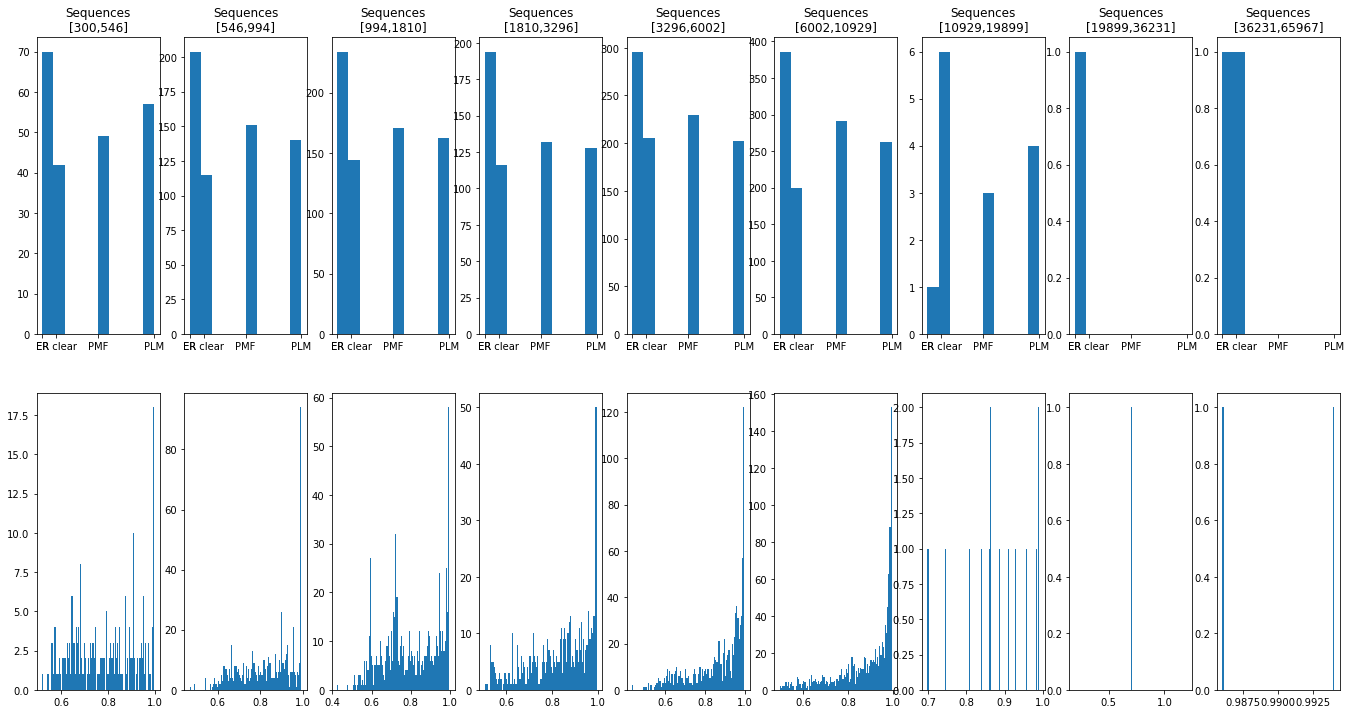

In [6]:
    
binned_auc, binned_method, binned_range = bin_by(max_aucs, max_auc_indices, MSA_sizes, metric_label='num_seq', n_bins=5)  
print(binned_range)

plt.figure(figsize=(26.0,12))
for i, auc_bin in enumerate(binned_auc[:-1]):
    method_bin = binned_method[i]
    
    ax = plt.subplot2grid((2,len(binned_auc)), (0,i))
    ax.hist(method_bin ,range=(0,2) )  # density=False would make counts
    ax.set_xticks([0,.25,1,2])
    ax.set_xticklabels(['ER', 'ER clear', 'PMF', 'PLM'])
    ax.set_title('%s\n[%d,%d]' %('Sequences', binned_range[i][0], binned_range[i][1]))
    plt.subplot2grid((2,len(binned_auc)),(1,i))
    plt.hist(auc_bin, bins = 100)  # density=False would make counts
plt.show()

In [7]:
import pandas as pd
import seaborn as sns
def gen_auc_df(aucs, max_aucs, shapes, pdb_ids, pfam_ids):
    cols = [msa_shape[1] for msa_shape in shapes]
    seqs = [msa_shape[0] for msa_shape in shapes]
    best_method = []
    for x in max_aucs:
        if x==0:
            best_method.append('ER')
        elif x==1:
            best_method.append('PMF')
        elif x==2:
            best_method.append('PLM')
    zipped = list(zip(aucs, best_method, seqs, effective_seqs, cols, pdb_ids, pfam_ids))
    df_labels = ['AUC', 'Best Method', '# Sequences', 'Effective Sequence #', '# Positions', 'PDB ID', 'Pfam ID']
    df = pd.DataFrame(zipped, columns=df_labels)
    return df

auc_df = gen_auc_df(max_aucs, max_auc_indices, MSA_sizes, pdb_ids, pfam_ids)



In [8]:
print(auc_df[auc_df.AUC==auc_df.AUC.max()])

          AUC Best Method  # Sequences  Effective Sequence #  # Positions  \
823  0.994945          ER         9610           1269.250058          185   

    PDB ID  Pfam ID  
823   3bcc  PF02167  


In [9]:
from joblib import Parallel, delayed
def get_tp_val(fp_val, fpr, tpr):
    for i, fp in enumerate(fpr):
        if fp < fp_val:
            continue
        elif fp == fp_val:
            return tpr[i]
        elif tpr[i] == tpr[i-1]:
            return tpr[i]
        if i > 0:
            d = np.sqrt(abs(fp - fpr[i-1])**2 + abs(tpr[i]-tpr[i-1])**2)
            avg_p = abs(fp_val-fpr[i-1])/d
            tp_val = tpr[i-1] + avg_p * abs(tpr[i]-tpr[i-1])
        else:
            d = np.sqrt(abs(fp - 0)**2 + abs(tpr[i]-0)**2)
            avg_p = fp_val/d
            tp_val = avg_p * tpr[i]
        return tp_val

def get_full_length_tpr(fprs, tprs, full_fpr, i):
    tpr = [get_tp_val(fp_val, fprs[i], tprs[i]) for fp_val in full_fpr]
    print('%d tpr full: ' % i,  len(tpr))
    return tpr

def get_average_roc(tprs, fprs):
    average_fpr = fprs[0]
    print(len(average_fpr))
    # fill average fpr with all
    for i, fpr in enumerate(fprs[1:]):
        average_fpr = np.unique(np.sort(np.concatenate((average_fpr, fpr))))
    print(len(average_fpr))

    average_tpr = np.zeros(len(average_fpr))
    tprs_full = Parallel(n_jobs = 14)(delayed(get_full_length_tpr)(fprs, tprs, average_fpr, i) for i in range(len(fprs)))
    for i, fpr in enumerate(fprs):
        average_tpr = np.add(np.array(tprs_full[i]), average_tpr)
        #plt.plot(fprs[i], tprs[i])
    average_tpr = average_tpr / len(fprs)
    #plt.plot(average_fpr, average_tpr, lw=2.5)
    return average_fpr, average_tpr, tprs_full


In [10]:
from scipy import stats
from math import gcd
from scipy.stats._stats_py import _attempt_exact_2kssamp
from collections import namedtuple
from biowulf_full.generate_average_roc import get_average_roc

def ks_compare_roc(tprs, fprs):
    """
    Notes
    -----
    This tests whether 2 samples are drawn from the same distribution. Note
    that, like in the case of the one-sample K-S test, the distribution is
    assumed to be continuous.
    This is the two-sided test, one-sided tests are not implemented.
    The test uses the two-sided asymptotic Kolmogorov-Smirnov distribution.
    If the K-S statistic is small or the p-value is high, then we cannot
    reject the hypothesis that the distributions of the two samples
    are the same.
    """
    MAX_AUTO_N = 10000  # 'auto' will attempt to be exact if n1,n2 <= MAX_AUTO_N
    mode = 'auto'
    alternative = 'two-sided'
    ROC_KstestResult = namedtuple('KstestResult', ('statistic', 'pvalue'))
    
    results = []
    # getting full length tprs as our cumulative distribution fucntions
    average_fpr, average_tpr, cdfs = get_average_roc(tprs, fprs, 10)
    for cdf1, cdf2 in zip(cdfs[:-1],cdfs[1:]):
        n1 = len(cdf1)
        n2 = len(cdf2)
        cddiffs = np.asarray(cdf1) - np.asarray(cdf2)
        # Ensure sign of minS is not negative.
        minS = np.clip(-np.min(cddiffs), 0, 1)
        maxS = np.max(cddiffs)

        d = max(minS, maxS)
        g = gcd(n1, n2)
        n1g = n1 // g
        n2g = n2 // g
        prob = -np.inf
        original_mode = mode
        if mode == 'auto':
            mode = 'exact' if max(n1, n2) <= MAX_AUTO_N else 'asymp'
        elif mode == 'exact':
            # If lcm(n1, n2) is too big, switch from exact to asymp
            if n1g >= np.iinfo(np.int32).max / n2g:
                mode = 'asymp'
                warnings.warn(
                    f"Exact ks_2samp calculation not possible with samples sizes "
                    f"{n1} and {n2}. Switching to 'asymp'.", RuntimeWarning)

        if mode == 'exact':
            success, d, prob = _attempt_exact_2kssamp(n1, n2, g, d, alternative)
            if not success:
                mode = 'asymp'
                if original_mode == 'exact':
                    warnings.warn(f"ks_2samp: Exact calculation unsuccessful. "
                                  f"Switching to method={mode}.", RuntimeWarning)

        if mode == 'asymp':
            # The product n1*n2 is large.  Use Smirnov's asymptoptic formula.
            # Ensure float to avoid overflow in multiplication
            # sorted because the one-sided formula is not symmetric in n1, n2
            m, n = sorted([float(n1), float(n2)], reverse=True)
            en = m * n / (m + n)
            if alternative == 'two-sided':
                prob = stats.distributions.kstwo.sf(d, np.round(en))
            else:
                z = np.sqrt(en) * d
                # Use Hodges' suggested approximation Eqn 5.3
                # Requires m to be the larger of (n1, n2)
                expt = -2 * z**2 - 2 * z * (m + 2*n)/np.sqrt(m*n*(m+n))/3.0
                prob = np.exp(expt)

        prob = np.clip(prob, 0, 1)
        results.append(ROC_KstestResult(d, prob))
    return results

print(len(ER_tprs[0]))
print(len(MF_tprs[0]))
print(len(PLM_tprs[0]))
print(len(PMF_tprs[0]))


ks_compare_roc([ER_tprs[100], PLM_tprs[100], PMF_tprs[100], MF_tprs[100]], [ER_fprs[100], PLM_fprs[100], PMF_fprs[100], MF_fprs[100]])

101
101
101
101
101
113


[KstestResult(statistic=0.24778761061946902, pvalue=0.001861967841412469),
 KstestResult(statistic=0.2743362831858407, pvalue=0.00037736499013606644),
 KstestResult(statistic=0.336283185840708, pvalue=4.651811339268177e-06)]

# KS Comparison

In [11]:
# plot best Method
from itertools import combinations

method_combos =['%svs%s' % combo for combo in combinations(method_label, 2)]
ks_vals = {}
p_vals = {}
for ks_combo in ks_compares[0].keys():
    ks_vals[ks_combo] = []
    p_vals[ks_combo] = []
print(ks_compares[0])
    
ER_combos = [combo for combo in method_combos if "ER" in combo]
PLM_combos = [combo for combo in method_combos if "PLM" in combo]
PMF_combos = [combo for combo in method_combos if "ER" in combo]
ks_max = .2

max_auc_indices = []
max_aucs = []
auc_differences = []
for i, er_auc in enumerate(method_aucs[0]):
    pmf_auc = method_aucs[1][i]
    plm_auc = method_aucs[2][i]
    auc_compare = [er_auc, pmf_auc, plm_auc]
    max_auc = max(auc_compare)
    max_aucs.append(max_auc)
    max_auc_index = auc_compare.index(max_auc)
    max_auc_indices.append(max_auc_index)
    auc_differences.append(abs(max_auc - np.mean([auc for auc in auc_compare if auc!=max_auc])))
    
    ks = ks_compares[i]
    for ks_combo in ks:
        ks_vals[ks_combo].append(ks[ks_combo][0])
        p_vals[ks_combo].append(ks[ks_combo][1])
    
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(ER_bootstrap_aucs[i], p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(ER_bootstrap_aucs[i], p))
    #print('ER auc =%f PLM auc=%f PMF auc=%f\n%.1f confidence interval %.1f%% and %.1f%%' % 
    #      (er_auc, plm_auc, pmf_auc, alpha*100, lower*100, upper*100))

    if max_auc_index == 0 and np.mean([ks[combo][0] for combo in ER_combos]) <= ks_max:
        max_auc_indices.append(.25)
    if max_auc_index == 1 and np.mean([ks[combo][0] for combo in PMF_combos]) <= ks_max:
        max_auc_indices.append(1.25)
    if max_auc_index == 2 and np.mean([ks[combo][0] for combo in PLM_combos]) <= ks_max:
        max_auc_indices.append(2.25)

{'ERvsPMF': (0.18382352941176472, 0.00019679676289925972), 'ERvsPLM': (0.48161764705882354, 6.108179175885149e-29), 'ERvsMF': (0.125, 0.028435175083603294), 'PMFvsPLM': (0.34558823529411764, 8.41895896227187e-15), 'PMFvsMF': (0.17279411764705882, 0.0005791531641115404), 'PLMvsMF': (0.49264705882352944, 2.522965400658655e-30)}


/data/cresswellclayec/conda/envs/plotting/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/cresswellclayec/conda/envs/plotting/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


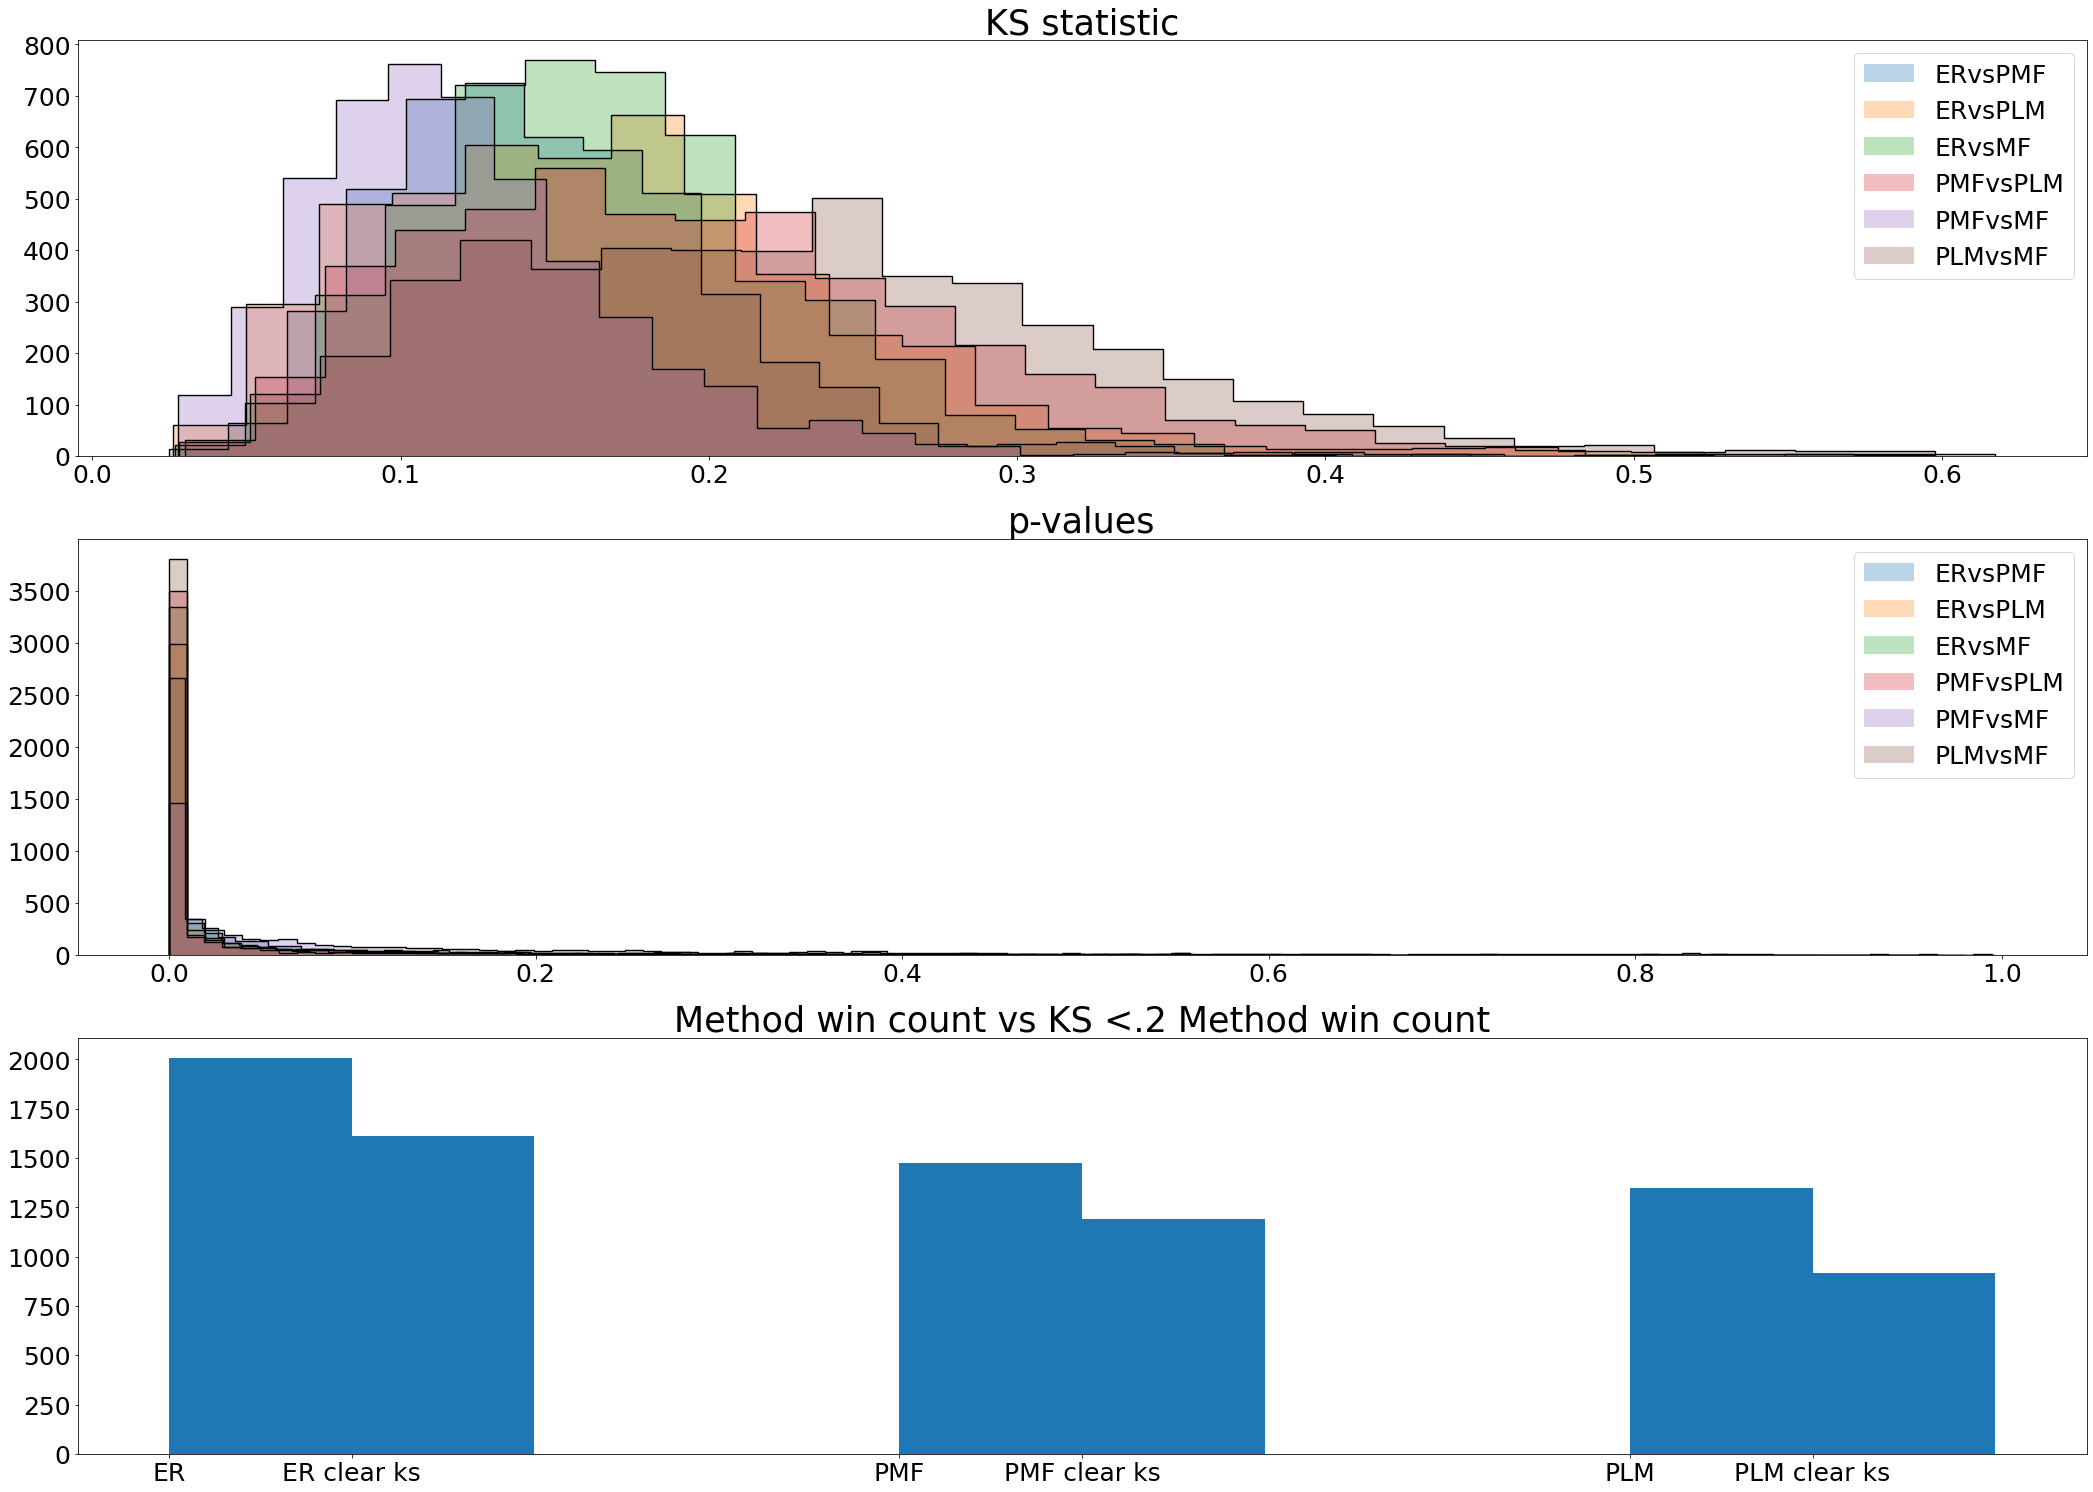

1 tpr full:  113
0 tpr full:  113
2 tpr full:  113
3 tpr full:  113


In [12]:
plt.figure(figsize=(36.0,26))
ax1=plt.subplot2grid((3,1), (0,0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((3,1), (1,0), colspan=1, rowspan=1)
ax3=plt.subplot2grid((3,1), (2,0), colspan=1, rowspan=1)


for ks_combo in ks_compares[0].keys():
    ax1.hist(ks_vals[ks_combo], bins=25, alpha=.3, label =ks_combo, )  # density=False would make counts
    ax1.hist(ks_vals[ks_combo], bins=25, histtype='step', color='k', linewidth=1.4)  # density=False would make counts

    ax2.hist(p_vals[ks_combo], bins=100, alpha=.3, label =ks_combo, linewidth=1.4)  # density=False would make counts
    ax2.hist(p_vals[ks_combo], bins=100, histtype='step', color='k', linewidth=1.4)  # density=False would make counts

ax1.legend(fontsize=25)
ax2.legend(fontsize=25)
ax1.set_title('KS statistic', fontsize = 35)
ax2.set_title('p-values', fontsize=35)

ax3.hist(max_auc_indices ,range=(0,2.5) )  # density=False would make counts
ax3.set_xticks([0,.25,1,1.25,2,2.25])
ax3.set_xticklabels(['ER', 'ER clear ks' , 'PMF', 'PMF clear ks', 'PLM', 'PLM clear ks'])
ax3.set_title('Method win count vs KS <.2 Method win count', fontsize=35)
plt.setp(ax1.get_xticklabels(),fontsize=25)
plt.setp(ax1.get_yticklabels(),fontsize=25)
plt.setp(ax2.get_xticklabels(),fontsize=25)
plt.setp(ax2.get_yticklabels(),fontsize=25)
plt.setp(ax3.get_xticklabels(),fontsize=25)
plt.setp(ax3.get_yticklabels(),fontsize=25)
plt.savefig('ks_comparison.pdf')
plt.show()